In [7]:
import pandas as pd  # <--- You need this import
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


In [2]:
# This is the missing step. You must load your CSV into a DataFrame.
# We'll use the mock data example:
data = pd.read_csv("/Users/utkarshtyagi/Downloads/Q_mock_data.csv")


##DID


In [ ]:
# --- 2. Create the dummy variables ---
# (Using the mock data column names)
data['Treat'] = (data['Branch'] == 'North').astype(int)  # in some examples Treat is already 0/1
# no need for this in those cases
data['Post'] = (data['Year'] >= 2023).astype(int)

In [4]:
# --- 3. Run the DiD Regression ---
# This part assumes 'data' now exists and has 'Treat' and 'Post'
model = smf.ols('Sales ~ Treat * Post', data=data).fit()

In [5]:
# --- 4. Print the results ---
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     225.2
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           2.25e-23
Time:                        10:06:40   Log-Likelihood:                -109.97
No. Observations:                  40   AIC:                             227.9
Df Residuals:                      36   BIC:                             234.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.6000      1.261     81.374      0.0

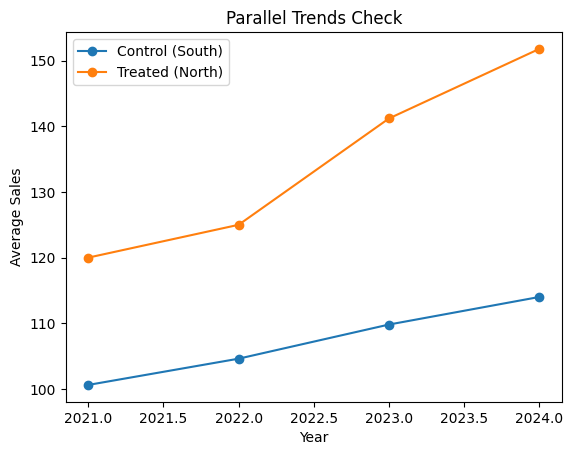

In [8]:
# Parallel trends plot
avg_trends = data.groupby(['Year', 'Treat'])['Sales'].mean().reset_index()
plt.plot(avg_trends[avg_trends['Treat']==0]['Year'], avg_trends[avg_trends['Treat']==0]['Sales'], marker='o', label='Control (South)')
plt.plot(avg_trends[avg_trends['Treat']==1]['Year'], avg_trends[avg_trends['Treat']==1]['Sales'], marker='o', label='Treated (North)')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Average Sales")
plt.title("Parallel Trends Check")
plt.show()